" CLustering usng K means Algorithm"

@ Author : Shivam Goyal

Date : 9 January, 2022

Version 1

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import csv

# Clustering package
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Define the path and list of required files

In [3]:
path = r"D:/UoW/Semester 1/Quantitative Studies -BSMM 8320/Excel Projects/Project 2/Output" 

In [4]:
# locate the data to be uploaded 
for i in os.listdir(path):
    if i.endswith(".csv"): # select ony the csv files
        print(i)

clustering_raw_data.csv


In [5]:
clustering_raw_data = pd.read_csv(path+'/clustering_raw_data.csv')

In [6]:
clustering_raw_data.columns

Index(['Customer Lifetime Value', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'Coverage', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Size'],
      dtype='object')

### Analyzing the variables for clustering

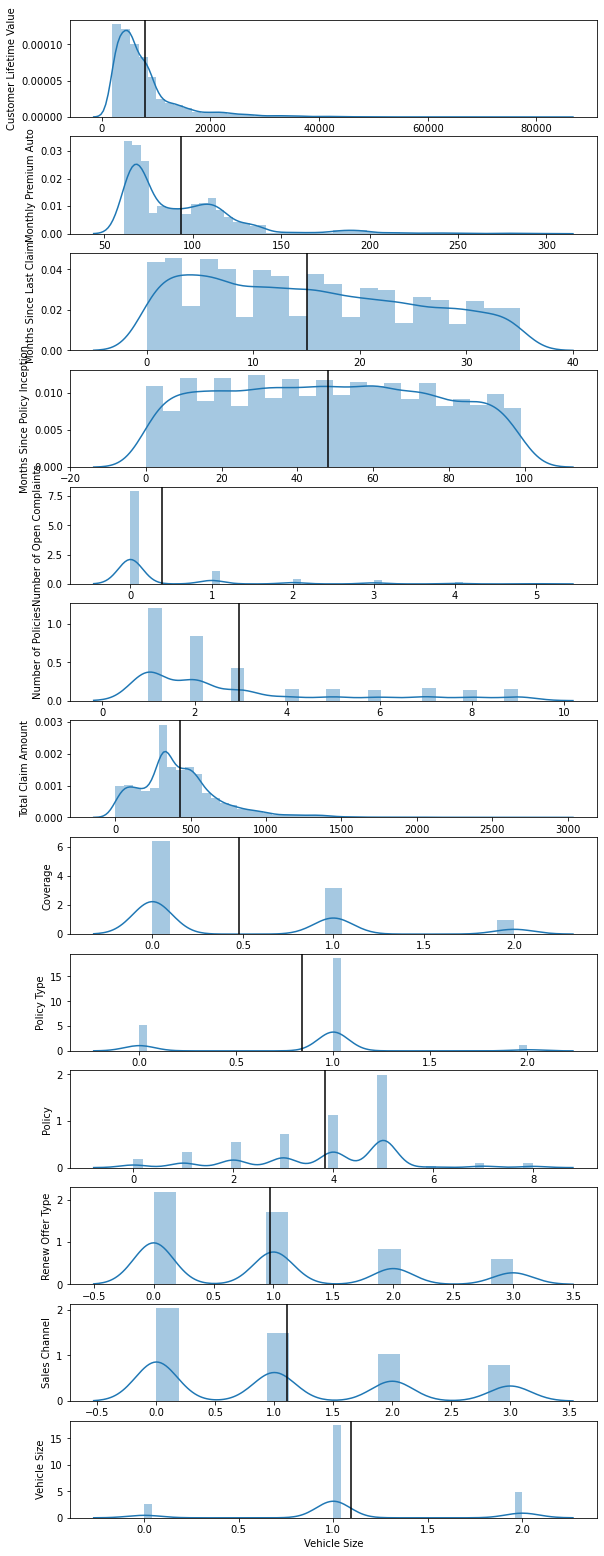

In [7]:
num = clustering_raw_data.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols

fig, axes = plt.subplots(n, 1, figsize=(24/2.54, 70/2.54))  # create subplots with n rows and 1 column

for ax, col in zip(axes, num):  # For each column...
    sns.distplot(num[col], ax=ax)   # Plot histogaerm
    ax.set(ylabel= col)
    ax.axvline(num[col].mean(), c='k')  # Plot mean

#### Standardization

In [8]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(clustering_raw_data) 
scaled_df

array([[-0.76206445, -0.70219428,  1.67841106, ..., -0.96307902,
        -1.03103509, -0.16971893],
       [-0.14630573,  0.0249932 , -0.20538206, ...,  1.01635938,
        -1.03103509, -0.16971893],
       [ 0.71655576,  0.43221818,  0.29035297, ..., -0.96307902,
        -1.03103509, -0.16971893],
       ...,
       [-0.43243113, -0.87671927,  0.786088  , ..., -0.96307902,
        -1.03103509, -0.16971893],
       [-0.45956231, -0.78945677,  1.57926405, ...,  0.02664018,
         0.83309108, -0.16971893],
       [ 1.40856681, -0.87671927,  1.48011705, ...,  0.02664018,
        -1.03103509, -0.16971893]])

#### Normalization

In [9]:
normalized_df = normalize(scaled_df) 
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.202575,-0.186660,0.446162,-0.412325,-0.113177,-0.218404,-0.043258,-0.195138,-0.468023,-0.304717,-0.256009,-0.274074,-0.045115
1,-0.038982,0.006659,-0.054722,-0.058884,-0.113440,0.561394,0.650565,0.211004,0.091180,0.192422,0.270801,-0.274711,-0.045220
2,0.232307,0.140125,0.094132,-0.118267,-0.138031,-0.130730,0.152673,0.751481,0.110945,0.234135,-0.312230,-0.334262,-0.055023
3,-0.014046,0.107250,0.083253,0.173711,-0.122078,0.484183,0.098432,-0.210486,-0.504834,-0.507269,-0.276145,0.238873,-0.048664
4,-0.311238,-0.241590,-0.125581,-0.061486,-0.175574,-0.338815,-0.421937,-0.302723,0.141121,-0.215871,-0.397154,-0.425177,-0.069989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,0.116480,-0.174664,-0.592219,-0.314543,-0.194554,-0.184263,0.138034,0.361881,0.156377,0.330012,0.012173,0.380689,-0.077555
8095,0.008192,0.260312,0.184829,-0.104871,-0.202035,0.602774,0.012162,-0.348346,0.162389,0.342701,-0.457009,-0.046965,-0.080537
8096,-0.171042,-0.346774,0.310926,-0.314921,-0.168403,0.005987,-0.355094,-0.290359,0.135357,0.285653,-0.380933,-0.407812,-0.067130
8097,-0.095476,-0.164012,0.328098,0.155738,0.820658,0.263900,-0.083093,-0.152509,0.071096,0.150038,0.005535,0.173078,-0.035260


### K Means Loop

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

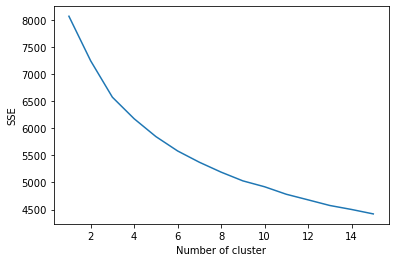

In [14]:
### The Elbow Method

sse = {}

for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42 ,max_iter=1000).fit(normalized_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

    plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

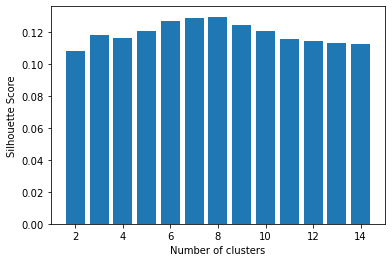

In [17]:
#### The Silhouette Coefficient Method

silhouette_scores = [] 

for n_cluster in range(2, 15):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7, 8,9, 10,11, 12,13, 14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 